In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
eps = 0.000001
data = np.array([0.012189092,	0.000836,	0.000708,	0.0000134,	0.003683158,	0.012313264,	0.014506693,	0.014560816,	0.011660093,	0.014383987,	0.014540713,	0.01095759,	0.000172,	0.012471503,	0.014549885,	0.00358868,	0.003005411,	0.008731469,	0.008432049,	0.014563335,	0.002133413,	0.001672443,	0.006216613,	0.00306785,	0.014485338,	0.002993782,	0.014114919,	0.014218961,	0.014508285,	0.004951977,	0.011576424,	0.009330315,	0.014560351,	0.003345492,	0.014562799,	0.014563212,	0.014558314,	0.011756225,	0.005631821,	0.014563261,	0.006217812,	0.002446918,	0.014516566,	0.014402356,	0.014563356,	0.014439132,	0.0003,	0.014308892,	0.013254674,	0.002987762,	0.014548334,	0.014390936,	0.014498479,	0.009713626,	0.013863024,	0.014563367,	0.014563167,	0.006825383,	0.002103993,	0.014563119,	0.002343343,	0.0000787,	0.014563342,	0.006454483,	0.014561299,	0.009397756,	0.003571348,	0.012654194,	0.002987136,	0.014196857,	0.010354826,	0.014474465,	0.014562533,	0.014521865,	0.008030334,	0.014563182,	0.00895547,	0.01152541,	0.014548613,	0.014541243,	0.014561206,	0.012069181,	0.01220905,	0.011818605,	0.014493132,	0.000219,	0.000000335,	0.002569901,	0.014563287,	0.000919,	0.008538002,	0.010274634,	0.003064117,	0.010341366,	0.014561517,	0.002992252,	0.013987906,	0.014168899,	0.01451498,	0.011577997,	0.001800333,	0.013575334,	0.0000185,	0.014563339,	0.012206023,	0.005304583,	0.014563362,	0.00472693,	0.01151021,	0.012843856,	0.007760848,	0.000815,	0.008404639,	0.0000251,	0.014561052,	0.002087466,	0.011578828,	0.0000755,	0.002740682,	0.013586152,	0.013085444,	0.003189073,	0.014563119,	0.011322467,	0.011576489,	0.011424139,	0.008016134,	0.007007776,	0.011270593,	0.014378912,	0.01441797,	0.007898851,	0.010172003,	0.014511191,	0.01456023,	0.011394382,	0.01456332,	0.002913245,	0.00071,	0.003040186,	0.01420521,	0.010495542,	0.011991869,	0.004481137,	0.014383781,	0.014114903,	0.005636875,	0.011651188,	0.005962354,	0.014563361,	0.014553987,	0.014563364,	0.01445646,	0.01455803,	0.013996998,	0.011214427,	0.003378323,	0.010632521,	0.014563038,	0.013288408,	0.014446417,	0.014563351,	0.011576827,	0.011789202,	0.001081422,	0.012300185,	0.014563367,	0.014207422,	0.014563335,	0.007098768,	0.01179491,	0.014510934,	0.014167271,	0.014563356,	0.011658909,	0.01456313,	0.014540652,	0.014561897,	0.014550003,	0.008498368,	0.0113924,	0.0000000819,	0.013091385,	0.003046782,	0.0000109,	0.002987341,	0.000142,	0.012235321,	0.011576769,	0.0000418,	0.003022424,	0.005446526,	0.0000238,	0.003791199,	0.013473333,	0.014409561,	0.014582059,	0.014459575,	0.014239706,	0.014563217])

Merge stuff

In [92]:
l = min(data)
u = max(data)

traces = pd.DataFrame({"L0":[np.sqrt(((l - min(data[0:n])) ** 2 + (u - max(data[0:n])) ** 2) / 2) / (u - l) for n in range(1,len(data)) ]})
for i in range(30):
    random.shuffle(data)
    traces[f"L{i+1}"] = [np.sqrt(((l - min(data[0:n])) ** 2 + (u - max(data[0:n])) ** 2) / 2) / (u - l) for n in range(1,len(data)) ]


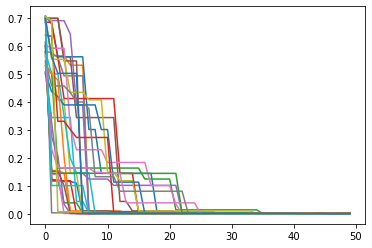

In [93]:
plt.plot(traces.iloc[:50,:])

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import beta as beta_dist
from scipy.special import hyp2f1
from scipy.special import beta as beta_func
from scipy.integrate import dblquad
import utils
import re
from functools import partial

In [4]:
def fit(data, n, a, b, eps=0) :
    samples = data[:n]
    
    pos = a - eps
    scale = b - a + 2 * eps
    params = beta_dist.fit(samples, floc = pos, fscale = scale)
        
    return params[0:2]

In [5]:
def _p_beta2(x, y, L, alpha, beta, n):
    return (
        (L + x) ** alpha *  hyp2f1(alpha, 1 - beta, alpha + 1, (L + x) / (L + x + y)) -
         x ** alpha * hyp2f1(alpha, 1 - beta, alpha + 1, x / (L + x + y))
    ) / (
        alpha * (L + x + y) ** alpha * beta_func(alpha, beta) 
    ) ** n
    

def p_beta(data, n, a, b, delta=0.05):
    alpha, beta = fit(data, n, a, b)
    L = b - a
    
    f = partial(_p_beta2, L = L, alpha = alpha, beta = beta, n = n)

    num, e1 = dblquad(f, 0, delta / 2, lambda x: 0, lambda x: delta / 2 )
    den, e2 = dblquad(f, 0,  a + (1 - b), lambda x: 0, lambda x: a + (1 - b) - x)
    
    return num/den

def p_unif(data, n, a, b, delta=0.05):
    L = b - a
    eps = delta / (2*L)
    return (1 + (1 + 2*eps)**(2 - n) - 2 * (1+ eps) ** (2-n)) / (1 - L ** (n - 2) - (n - 2) * (1 - L) * L ** (n - 2))

In [32]:
out = pd.DataFrame()
out["uno"] = list(range(10))
out["due"] = list(range(10))

In [33]:
out

,uno,due
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [37]:
out1 = out

n 3
n 4
n 5
n 6
n 7
n 8
n 9
n 10
n 11
n 12
n 13
n 14
n 15
n 16
n 17
n 18
n 19
n 20
n 21
n 22
n 23
n 24
n 25
n 26
n 27
n 28
n 29
n 3
n 4
n 5
n 6
n 7
n 8
n 9
n 10
n 11
n 12
n 13
n 14
n 15
n 16
n 17
n 18
n 19
n 20
n 21
n 22
n 23
n 24
n 25
n 26
n 27
n 28
n 29


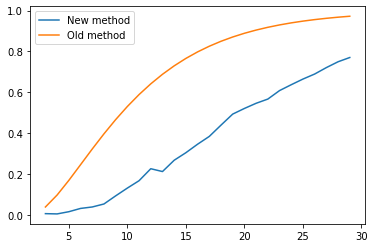

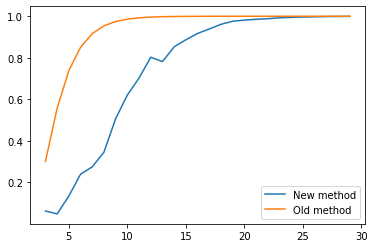

In [38]:
a = min(data)
b = max(data)
#out = pd.DataFrame()
delta = 0.01
r_beta = list()
r_unif = list()
for n in range(3, 50):
    r_beta.append(p_beta(data, n, a, b, delta=delta))
    r_unif.append(p_unif(data, n, a, b, delta=delta))
    print("n",n)

#out[f"old_{delta}"] = r_unif
#out[f"new_{delta}"] = r_beta

plt.figure()
plt.plot(range(3,30),np.array(r_beta), label="New method")
plt.plot(range(3,30),np.array(r_unif), label="Old method")
plt.legend()


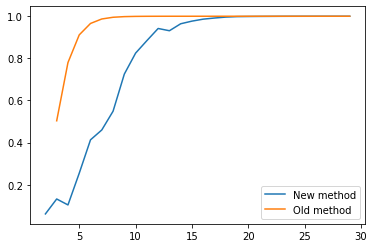

In [36]:
out.to_csv("interval_new_vs_old_0.01_0.05_0.075.csv")
